##Домашняя работа


#Easy

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import precision_recall_fscore_support

In [230]:
data = pd.read_csv('C:\\Users\\UserOfPC\\Downloads\\brunoyam\\data\\iris.csv', sep=',', quoting=3, engine='python')


In [231]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


преобразуем столбец в категорию, а затем использовать эти значения категории для кодирования метки:

In [232]:
data["variety"] = data["variety"].astype('category')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


назначим закодированную переменную новому столбцу с помощью метода доступа (accessor) cat.codes:

In [233]:
data["variety_cat"] = data["variety"].cat.codes
data = data.dropna()
data

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_cat
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


Виды ирисов закодировались так: Setosa - 0, Virginica - 2, Versicolor - 1

In [234]:
#целевой признак «variety» в переменную y_train, а оставшиеся признаки в переменную X_train:
X = data.drop('variety', axis=1)
X = X.drop('variety_cat', axis=1)
y = data['variety_cat']
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Номализуем значения признаков

In [235]:
X = (X - X.mean()) / X.std()

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [237]:
model = DecisionTreeClassifier()

Создаем словарь с параметрами для GridSearchCV

max_depth – глубина дерева. Она будет изменяться от 1 до 12 с шагом в 2

min_samples_leaf – минимальное число образцов в листах. Оно будет изменяться от 1 до 5

min_samples_leaf – минимальное число образцов для сплита. Оно будет изменяться от 2 до 7.

In [193]:
parametrs = { 'max_depth': range (1,8),
            'min_samples_leaf': range (1,6),
            'min_samples_split': range (2,8) }

In [194]:
grid = GridSearchCV(model, parametrs)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 8),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 8)})

In [195]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [146]:
scoring = ['accuracy']
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2)
scores = cross_validate(clf, X, y, cv=7,scoring=scoring, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy
0,0.000000,0.000000,0.954545,1.0
1,0.000000,0.000000,1.000000,1.0
2,0.011124,0.000998,0.909091,1.0
3,0.001000,0.001000,0.904762,1.0
4,0.001000,0.001000,0.952381,1.0
5,0.001000,0.001000,0.952381,1.0
6,0.001000,0.001000,1.000000,1.0


#Medium


Провести полноценное исследование:

    1. Визуализировать данные (провести EDA)
    
    2. Если требуется, подготовить данные к обучению модели
    
    3. Обучить 4 различные модели классификации, посчитать accuracy ,presicion, recall, F1-score для каждой модели
    
    4. Проверить действительно ли есть статистическое различие между метриками качества моделей
    
    5. Выбрать лучшую модель

In [69]:
data1= data.groupby(['variety'])['sepal.length'].count()
data1

variety
Setosa        50
Versicolor    50
Virginica     49
Name: sepal.length, dtype: int64

Видим, что всего у нас 3 класса - в каждом по 50 элементов

Посмотрим на барплоте как распределены данные по 3 классам и 4м признакам

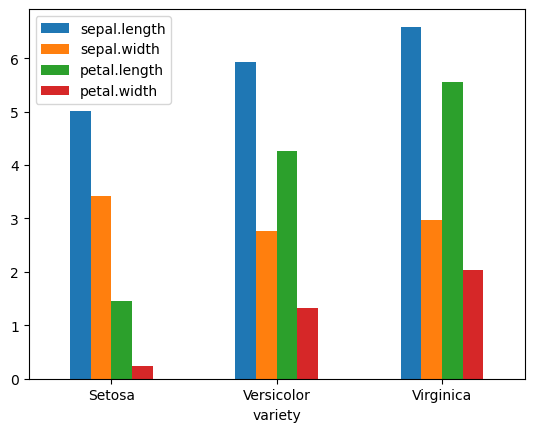

In [248]:
data1 = data.drop('variety_cat', axis=1)
data1 = data1.groupby(['variety']). mean()

axes = data1.plot.bar(rot=0) 


In [71]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
variety_cat     0
dtype: int64

Нулевых значений в Датасете - нет

In [72]:
data.shape

(149, 6)

In [73]:
data = data.drop_duplicates()
data.shape

(149, 6)

Выше мы посмотрели на размерность Датасета и удалили один дубликат.

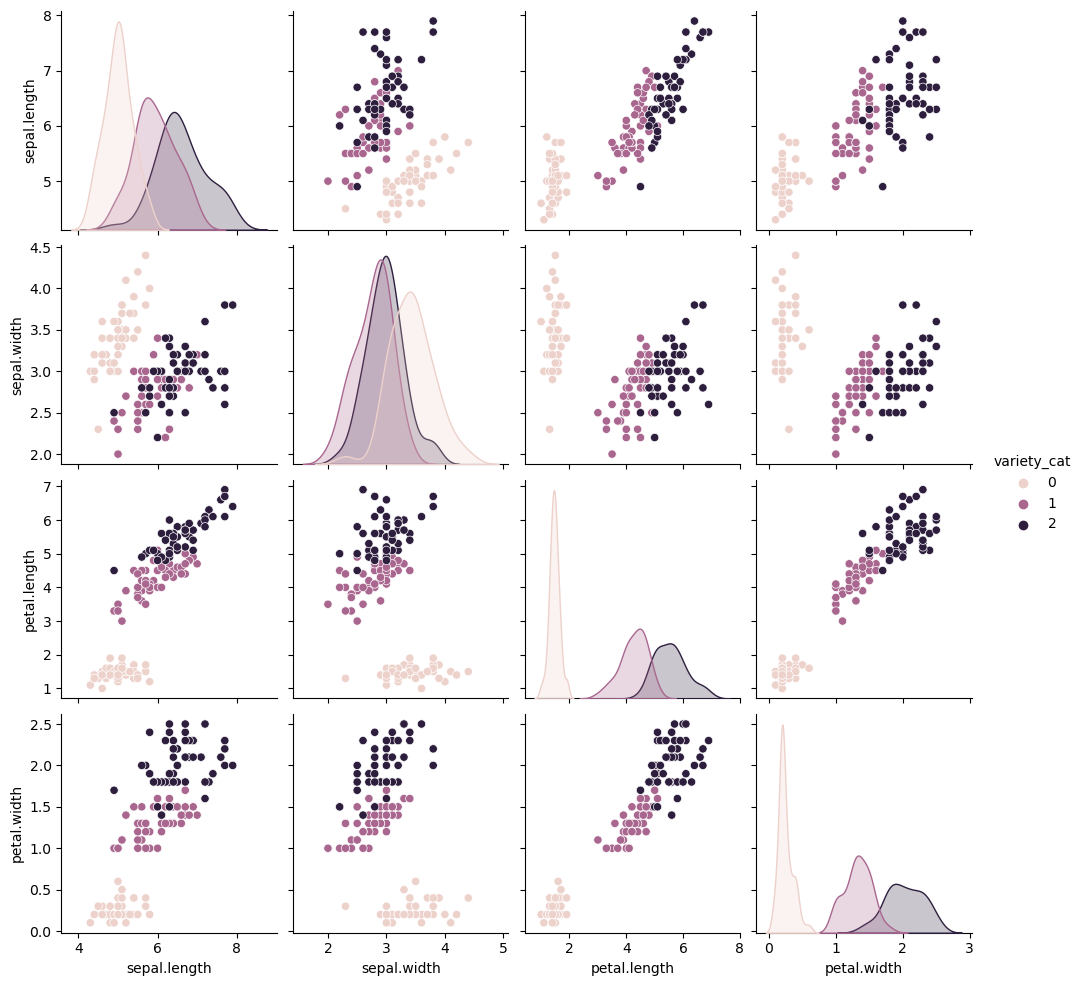

In [74]:
sns.pairplot(data, hue="variety_cat")

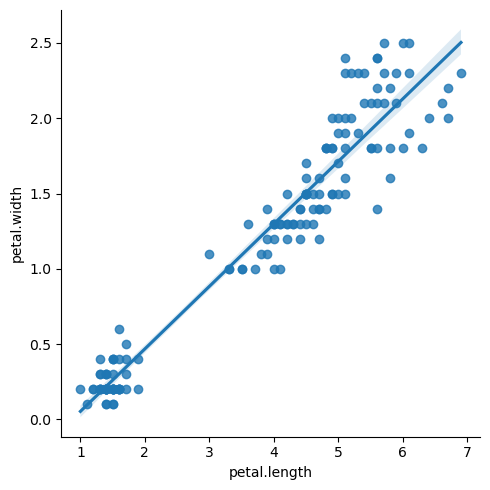

In [75]:
sns.lmplot(x="petal.length", y="petal.width", data=data)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

Модель №1

In [79]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

In [80]:
# посмотрим на параметр «Точность измерений» (Accuracy).
accuracy_score(y_pred1, y_test)

0.9666666666666667

In [93]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Модель №2

In [100]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
y_pred2 = model2.predict(X_test)

In [102]:
accuracy_score(y_pred2, y_test)

0.9666666666666667

In [104]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Модель №3

In [87]:
model3 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
model3.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [106]:
y_pred3 = model3.predict(X_test2)

In [108]:
accuracy_score(y_pred3, y_test)

0.9666666666666667

In [105]:
print(classification_report(y_test2, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Модель №4

In [89]:
model4 = RandomForestClassifier()
model4.fit(X_train2, y_train2)

RandomForestClassifier()

In [90]:
y_pred4 = model4.predict(X_test2)

In [109]:
accuracy_score(y_pred4, y_test)

0.9666666666666667

In [91]:
print(classification_report(y_test2, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



StackingClassifier. Стек оценок с окончательным классификатором.

Обобщение с накоплением состоит в суммировании выходных данных отдельного классификатора  и использовании классификатора для вычисления окончательного прогноза. Наложение позволяет использовать силу каждого отдельного класс-ра, используя их выходные данные в качестве входных данных для окончательного классиф-ра.

In [244]:
estimators = [
    ('Tree', DecisionTreeClassifier()),
    ('Forest', RandomForestClassifier()),
    ('Neighbors', KNeighborsClassifier()),
    ('Log', LogisticRegression())
]
clf=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train).score(X_test, y_test)

0.9666666666666667

In [125]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [126]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

Decision Regions Функция для построения областей принятия решений классификаторов в 1 или 2 измерениях. 

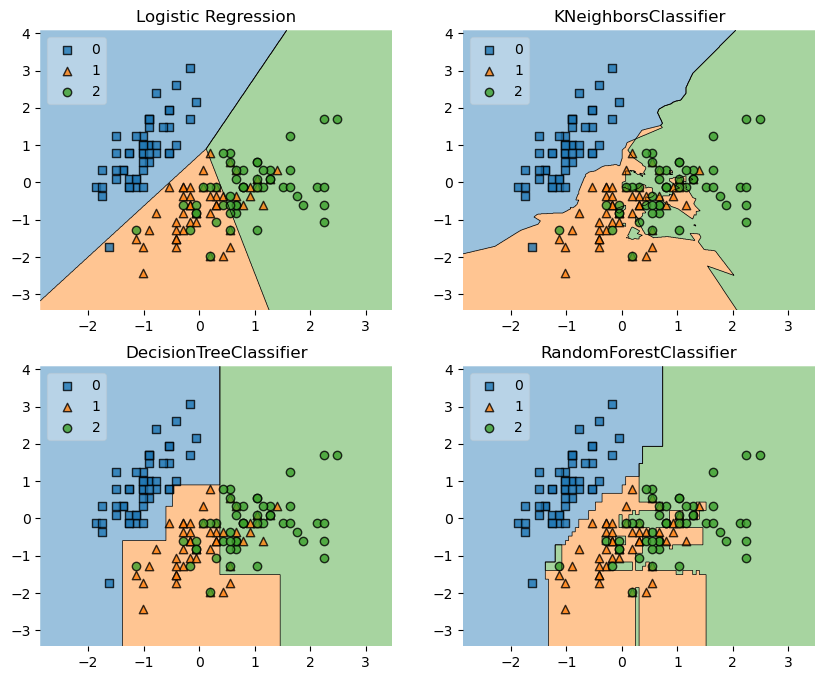

In [240]:
X2 = X.iloc[:,0:2]
X2 = X2.to_numpy()
y2 = y.to_numpy()

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression', 'KNeighborsClassifier', 
          'DecisionTreeClassifier', 'RandomForestClassifier']

for clf, lab, grd in zip([model1, model2, model3, model4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X2, y2)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X2, y=y2,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

Интерпритация: 

все 4 модели 'Logistic Regression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier' показали примерно одинаковые результаты по метрикам качества accuracy ,presicion, recall, F1-score. Однако, если внимательно изучить subplot, представленный выше, возможно более точной окажется прогноз модели RandomForestClassifier.